## 🧠 Exercise 1 – Bit Pattern Search and Evolutionary Optimization

### 🎯 Objective
The goal of this exercise is to simulate and analyze different search strategies for discovering a correct bit pattern, where each bit can take the value 0 or 1.
Starting from random guesses, we progressively implement more intelligent search algorithms to observe their performance and convergence behaviors.

### 🧩 Tasks Overview
1. **Simulation Environment**
   - Generate random bit patterns of different sizes.
   - Measure how many attempts and how long it takes to guess the correct pattern randomly.
   - Plot boxplots for attempts and runtime versus pattern size.

2. **Fitness Function & Mutation Search**
   - Define a fitness function that measures similarity between the guessed and correct pattern.
   - Implement a mutation-based hill-climbing algorithm that accepts only improving mutations.
   - Measure how quickly it converges and whether it always finds the correct solution.

3. **Population-Based Search**
   - Extend the approach to a population of patterns.
   - Introduce selection of best individuals and mutation of weaker ones.
   - Observe the effect of population evolution on convergence.

4. **Crossover Operator**
   - Implement a one-point crossover between two high-fitness patterns.
   - Combine crossover and mutation to evolve a population more efficiently.
   - Compare all four strategies (random, mutation, population, population + crossover).

### ⚙️ Tools Used
- **Python 3**
- **NumPy** and **random** for data generation
- **Matplotlib** for boxplots and visual analysis
- **statistics.mean** will be handy for computing averages
- **time** for runtime measurement

The experiments are reproducible using fixed random seeds to ensure comparable results across runs.


🧩 Cell 1 — Imports & basic setup

In [61]:
# Step 1: Import basic libraries
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean


📝 Cell 2 – Core Helper Functions (random pattern, fitness, mutation)
### This cell defines basic helper functions used across all tasks.
1. random_pattern(size, seed): creates a reproducible random bit pattern.
2. fitness(guess, target): counts how many bits match the target (max when perfect match).
3. mutate(pattern): flips exactly one randomly chosen bit in a string.

In [62]:
# Generate a random bit pattern of a given size (string of 0s and 1s).
def random_pattern(size, seed=None):
    if seed is not None:
        random.seed(seed)
    return ''.join(random.choice('01') for _ in range(size))

# Compute fitness: number of matching bits between guess and target
def fitness(guess, target):
    return sum(g == t for g, t in zip(guess, target))

# Flip one bit in a pattern (mutation)
def mutate(pattern):
    pattern = list(pattern)
    idx = random.randrange(len(pattern))
    pattern[idx] = '1' if pattern[idx] == '0' else '0'
    return ''.join(pattern)


🔁 Cell 3 — Random Search Algorithm with functionalities
### Generate random patterns repeatedly and measure attempts / time
- This function repeatedly generates random bit patterns until one matches the target exactly.
- It returns both the number of attempts and the elapsed time in seconds.

In [63]:
# Try random guesses until we find the correct pattern
def random_search(target):
    attempts = 0
    start_time = time.time()
    while True:
        attempts += 1
        guess = random_pattern(len(target))
        if guess == target:
            break
    elapsed = time.time() - start_time
    return attempts, elapsed


📈 Cell 4 — Run Random Search Experiments and Collect Data
### Experiment & graphs implemented
- For each pattern size (2,4,8,12,16 bits), perform 30 independent random-search trials.
- Each trial measures how many attempts and how long it took to guess the correct pattern.

In [64]:
sizes = [2, 4, 8, 12, 16]
n_trials = 30
results_attempts, results_time = {}, {}

for size in sizes:
    attempts_list, time_list = [], []
    target = random_pattern(size, seed=42)
    for seed in range(n_trials):
        random.seed(seed)
        a, t = random_search(target)
        attempts_list.append(a)
        time_list.append(t)
    results_attempts[size] = attempts_list
    results_time[size] = time_list
    print(f"Size {size} bits: mean attempts = {np.mean(attempts_list):.1f}, mean time = {np.mean(time_list):.4f}s")


Size 2 bits: mean attempts = 3.2, mean time = 0.0000s
Size 4 bits: mean attempts = 17.0, mean time = 0.0000s
Size 8 bits: mean attempts = 296.9, mean time = 0.0006s
Size 12 bits: mean attempts = 5448.0, mean time = 0.0136s
Size 16 bits: mean attempts = 98070.8, mean time = 0.3299s


📊 Cell 5 — Boxplots for attempts and time
### Experiment & graphs implemented
- This cell visualizes the random search performance.
- Two side-by-side boxplots show how attempts and runtime grow with pattern size.

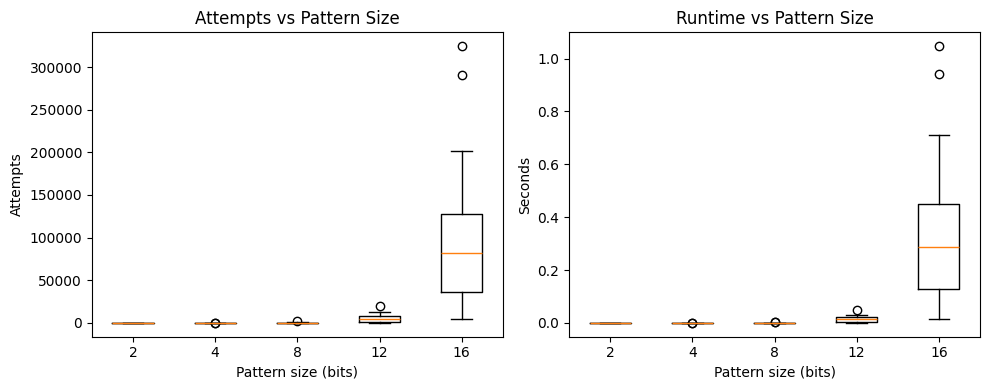

In [65]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot([results_attempts[s] for s in sizes], tick_labels=sizes)
plt.title("Attempts vs Pattern Size")
plt.xlabel("Pattern size (bits)")
plt.ylabel("Attempts")

plt.subplot(1,2,2)
plt.boxplot([results_time[s] for s in sizes], tick_labels=sizes)
plt.title("Runtime vs Pattern Size")
plt.xlabel("Pattern size (bits)")
plt.ylabel("Seconds")
plt.tight_layout()
plt.show()


🧬 Cell 6 — Mutation-based hill climbing algorithm
### Create a mutation function and accept only if fitness improves
Use mutate() function in a loop where the change is accepted only if it generates a better solution.
- Implements a simple hill-climbing search:
- Start from a random pattern.
- Performs up to 1000 mutations.
- Accepts only improving mutations.
- Repeatedly mutate one bit.
- Accept the change only if fitness improves.
- Stop if the correct pattern is found or after 1000 iterations.
- Returns iteration count and whether success was achieved.


In [66]:
def mutation_search(target, max_iter=1000):
    current = random_pattern(len(target))
    best_fit = fitness(current, target)
    for i in range(max_iter):
        new = mutate(current)
        new_fit = fitness(new, target)
        if new_fit > best_fit:
            current, best_fit = new, new_fit
        if current == target:
            return i+1, True  # iterations, success
    return max_iter, current == target


📉 Cell 7 — Evaluate mutation search over 30 runs
### Test & visualize
- This cell runs the mutation-based search 30 times on a 12-bit pattern.
- It records the number of iterations to success and computes how often it converged.


Mean iterations: 31.2
Success rate: 100.0%


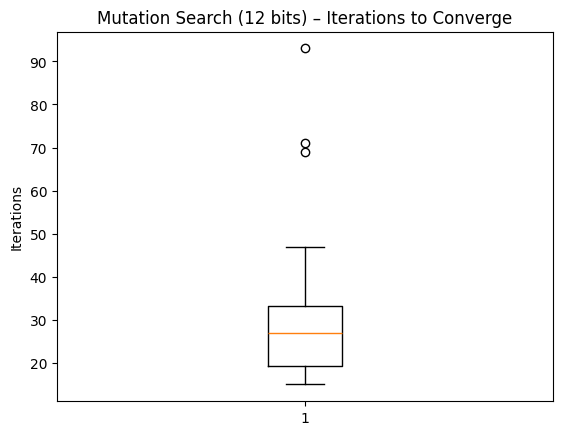

In [67]:
n_trials = 30
iters_list, success_list = [], []

target = random_pattern(12, seed=123)

for seed in range(n_trials):
    random.seed(seed)
    iters, success = mutation_search(target)
    iters_list.append(iters)
    success_list.append(success)

print(f"Mean iterations: {np.mean(iters_list):.1f}")
print(f"Success rate: {np.mean(success_list)*100:.1f}%")
plt.boxplot(iters_list)
plt.title("Mutation Search (12 bits) – Iterations to Converge")
plt.ylabel("Iterations")
plt.show()


🧪 Cell 8 — Population-based evolutionary search
### This function implements a simple population-based evolutionary algorithm:
- Initialize 100 random patterns.
- Evaluate fitness for all individuals.
- Keep the top 30 % ("parents") and fill the rest by mutating them.
- Stop when fitness stagnates or the correct pattern is found.

In [68]:
def population_search(target, pop_size=100, select_ratio=0.3, max_gen=100):
    size = len(target)
    pop = [random_pattern(size) for _ in range(pop_size)]
    best_history = []
    for gen in range(max_gen):
        fits = [fitness(p, target) for p in pop]
        best_fit = max(fits)
        best_history.append(best_fit)
        if best_fit == size:
            break
        # Selection
        sorted_pop = [p for _, p in sorted(zip(fits, pop), reverse=True)]
        survivors = sorted_pop[:int(pop_size*select_ratio)]
        # Generate new via mutation
        offspring = [mutate(random.choice(survivors)) for _ in range(pop_size - len(survivors))]
        pop = survivors + offspring
        # Check stagnation
        if len(best_history) > 5 and len(set(best_history[-5:])) == 1:
            break
    return gen+1, max(best_history)


📝 Cell 9 – Evaluate Population Search (Generations to Convergence)
##### Run the population-based search 30 times and plot a boxplot of generations required.
##### This shows how evolutionary strategies improve convergence efficiency.

Average generations: 4.3


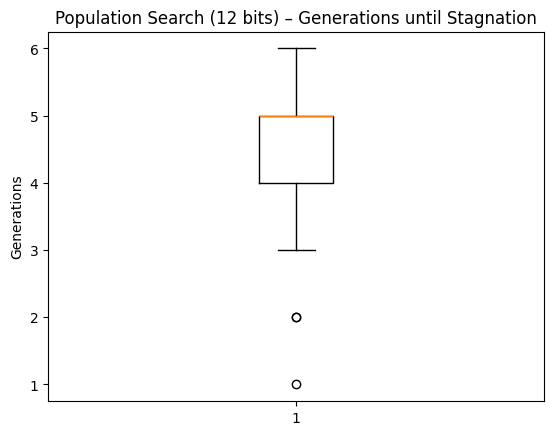

In [69]:
n_trials = 30
gens_list = []
target = random_pattern(12, seed=7)

for seed in range(n_trials):
    random.seed(seed)
    gens, best = population_search(target)
    gens_list.append(gens)

print(f"Average generations: {np.mean(gens_list):.1f}")
plt.boxplot(gens_list)
plt.title("Population Search (12 bits) – Generations until Stagnation")
plt.ylabel("Generations")
plt.show()


🧩 Cell 10 — Crossover operator
##### Defines a simple one-point crossover between two parent bitstrings.
##### This operator will later be used to combine high-fitness individuals.

In [70]:
def crossover(p1, p2):
    point = random.randint(1, len(p1)-1)
    child = p1[:point] + p2[point:]
    return child


📝 Cell 11 – Population Search with Crossover and Mutation
### This variant of the population search adds crossover:
- The best 30 % survive as parents.
- New individuals are created by crossing two parents and optionally mutating.
- Stops on convergence or after max_gen generations.

In [71]:
def population_search_crossover(target, pop_size=100, select_ratio=0.3, max_gen=100):
    size = len(target)
    pop = [random_pattern(size) for _ in range(pop_size)]
    best_history = []
    for gen in range(max_gen):
        fits = [fitness(p, target) for p in pop]
        best_fit = max(fits)
        best_history.append(best_fit)
        if best_fit == size:
            break
        sorted_pop = [p for _, p in sorted(zip(fits, pop), reverse=True)]
        survivors = sorted_pop[:int(pop_size*select_ratio)]
        offspring = []
        for _ in range(pop_size - len(survivors)):
            p1, p2 = random.sample(survivors, 2)
            child = crossover(p1, p2)
            # optional mutation
            if random.random() < 0.3:
                child = mutate(child)
            offspring.append(child)
        pop = survivors + offspring
        if len(best_history) > 5 and len(set(best_history[-5:])) == 1:
            break
    return gen+1, max(best_history)


📝 Cell 12 – Compare All Methods and Plot Results
### This final cell runs and compares four strategies:
1. Random Search
2. Mutation (Hill-Climbing)
3. Population Search (Selection + Mutation)
4. Population Search with Crossover
#### Each method is repeated 30 times on the same 12-bit target pattern.
#### Results are compared via mean, std, runtime, and a boxplot of convergence speed.


Random Search: mean=3202.6, std=2720.1, time=0.25s
Mutation Search: mean=31.2, std=17.8, time=0.00s
Population: mean=4.3, std=1.3, time=0.02s
Crossover: mean=3.6, std=0.9, time=0.02s


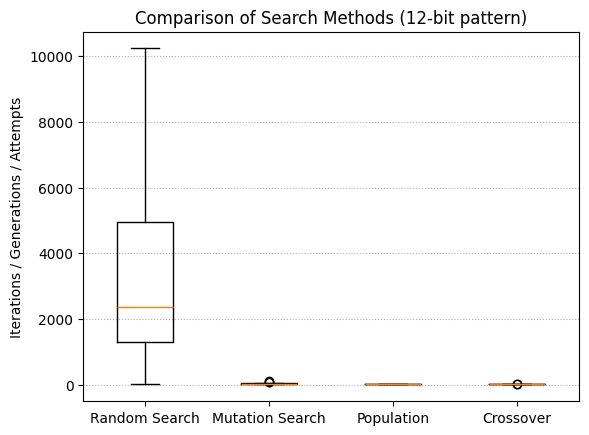

In [72]:
methods = {
    "Random Search": lambda t: random_search(t),
    "Mutation Search": lambda t: mutation_search(t),
    "Population": lambda t: population_search(t),
    "Crossover": lambda t: population_search_crossover(t)
}

target = random_pattern(12, seed=123)
results = {}

for name, func in methods.items():
    trials = []
    start = time.time()
    for seed in range(30):
        random.seed(seed)
        res = func(target)
        trials.append(res[0])
    results[name] = trials
    print(f"{name}: mean={np.mean(trials):.1f}, std={np.std(trials):.1f}, time={time.time()-start:.2f}s")

plt.boxplot([results[m] for m in methods.keys()], tick_labels=list(methods.keys()))
plt.ylabel("Iterations / Generations / Attempts")
plt.title("Comparison of Search Methods (12-bit pattern)")
plt.grid(True, axis='y', linestyle=':')
plt.show()


### ✅ Discussion and Conclusions

#### 🧾 Summary of Results
- **Random Search** shows exponential growth in attempts and runtime as pattern size increases.
  It becomes computationally infeasible beyond a few bits.
- **Mutation (Hill-Climbing)** improves efficiency by accepting only beneficial mutations.
  It often converges quickly but may get stuck in local optima for certain seeds.
- **Population-Based Search** further enhances performance by maintaining diversity among candidate solutions.
  Fitness stagnation is less frequent, and convergence is faster on average.
- **Crossover + Mutation** produces the most stable and consistent convergence.
  Combining high-fitness individuals accelerates evolution by reusing partial solutions.

#### 📊 Observations
- The number of generations required decreases significantly with evolutionary mechanisms.
- Mutation alone sometimes fails to converge in the maximum number of iterations, but population and crossover almost always reach the target.
- Boxplots show smaller variance (tighter boxes) for the crossover approach, meaning it is more reliable across trials.

#### 🔍 Conclusions
1. Search strategies inspired by **evolutionary computation** (selection, mutation, crossover) significantly outperform naive random guessing.
2. Increasing the pattern size exponentially increases the search space, highlighting the advantage of guided search.
3. Evolutionary algorithms are robust and adaptable, demonstrating convergence even in large search spaces.

#### 🚀 Future Improvements
- Implement adaptive mutation rates based on generation progress.
- Test alternative selection methods (e.g., tournament, roulette-wheel).
- Explore multi-point crossover for further efficiency gains.

Overall, this exercise illustrates how simple biological concepts—mutation, selection, and recombination—can be used to efficiently solve combinatorial optimization problems.
